# Homework 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from matplotlib.patches import Ellipse
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

## Exercise 1: Correlations
Let's recreate the plot from the lecture. Assume two neurons that are tuned to a directed stimulus $s\in[0, 2\pi]$. The neurons are Poisson neurons with rates (in Hz)
\begin{align}
r_1(s) &= \exp\left(\sin(s - \frac{\pi}{4})\right) \\
r_2(s) &= \exp\left(\sin\left(s - \frac{\pi}{2}\right)\right)
\end{align}

### a)

Draw 10,000 stimuli uniformly. For both neurons, draw spike counts for a measurement duration of 25 seconds and save the firing rates. Discretize the range for the stimuli into 20 bins and compute the tuning curves (average firing rate). Plot the tuning curves for both neurons into separate subplots. Additionally, pick one bin and plot all firing rates for that bin as a scatter plot (for each neuron, plot into the same corresponding subplot). (3 points)

In [34]:
np.random.seed(0)
s = np.random.uniform(0, 2 * np.pi, 10000)

# rates of the Poisson
rates1 = np.exp(np.sin(s - np.pi / 4)) * 25
rates2 = np.exp(np.sin(s - np.pi / 2)) * 25

# firing rates
r1, r2 = np.random.poisson(rates1) / 25, np.random.poisson(rates2) / 25

# bin stimuli into 20 bins
bins = np.linspace(0, 2 * np.pi, 21)
bin_indices = np.digitize(s, bins) - 1  # subtract 1 to get 0-based indices

# tuning curves (mean firing rates per bin)
f1 = np.array([r1[bin_indices == i].mean() for i in range(20)])
f2 = np.array([r2[bin_indices == i].mean() for i in range(20)])

# get firing rates for one bin
r1_10 = r1[bin_indices == 10]
r2_10 = r2[bin_indices == 10]

<Figure size 1000x500 with 0 Axes>

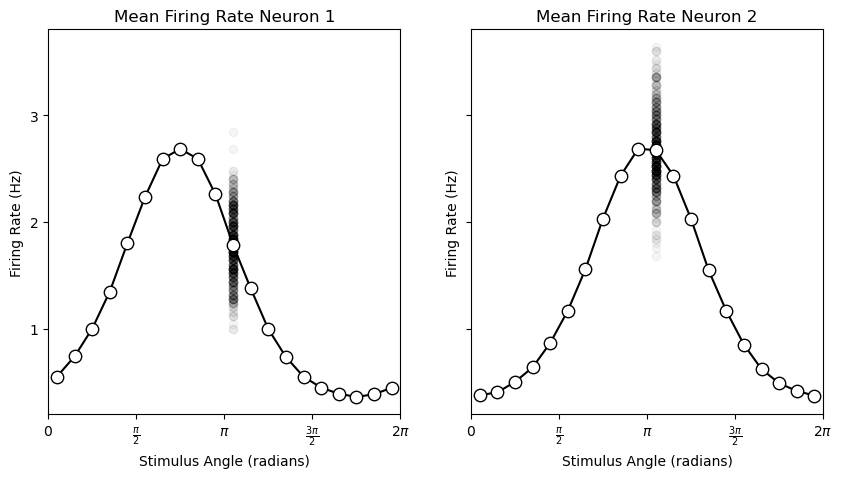

In [35]:
# plot tuning curves
plt.figure(figsize=(10, 5))
bins_center = (bins[:-1] + bins[1:]) / 2
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)
x = np.ones_like(r1_10) * bins_center[10]

ax[0].plot(bins_center, f1, label='Neuron 1', color='black')
ax[0].set_title('Mean Firing Rate Neuron 1')
ax[0].set_xlim(0, 2 * np.pi)
ax[0].set_xlabel('Stimulus Angle (radians)')
ax[0].set_ylabel('Firing Rate (Hz)')
ax[0].plot(bins_center, f1, label='Neuron 1', color='black', zorder=1, linewidth=.5)
ax[0].scatter(bins_center, f1, facecolors='white', edgecolors='black', s=80, alpha=1, zorder=2, linewidth=1)
ax[0].set_xticks(bins_center)
ax[0].set_xticks(np.arange(0, 2 * np.pi + 0.01, np.pi / 2))
ax[0].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[0].set_yticks(np.arange(0, 4))
ax[0].scatter(x, r1_10, alpha=0.04, color='black')


ax[1].plot(bins_center, f2, label='Neuron 2', color='black')
ax[1].set_title('Mean Firing Rate Neuron 2')
ax[1].set_xlim(0, 2 * np.pi)
ax[1].set_xlabel('Stimulus Angle (radians)')
ax[1].set_ylabel('Firing Rate (Hz)')
ax[1].plot(bins_center, f2, label='Neuron 2', color='black', zorder=1, linewidth=.5)
ax[1].scatter(bins_center, f2, facecolors='white', edgecolors='black', s=80, alpha=1., zorder=2, linewidth=1)
ax[1].set_xticks(bins_center)
ax[1].set_xticks(np.arange(0, 2 * np.pi + 0.01, np.pi / 2))
ax[1].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[1].scatter(x, r2_10, alpha=0.04, color='black')

### b)

 For this one bin, scatter plot the firing rates. Compute and plot the noise correlation. (1 point)



Text(0.5, 0.98, 'noise correlation   0.04')

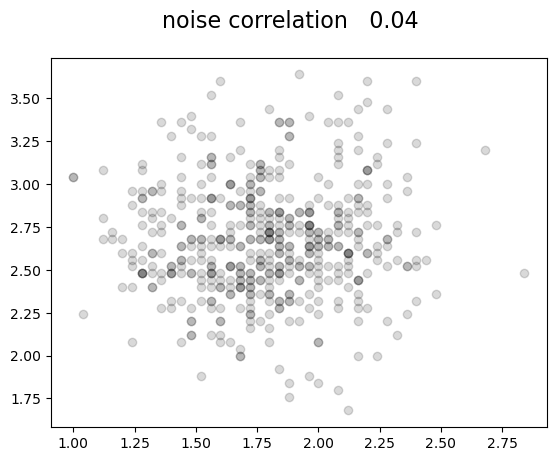

In [4]:
plt.scatter(r1_10, r2_10, alpha=0.15, color='black')

correlation = np.corrcoef(r1_10, r2_10)
plt.suptitle(f'noise correlation   {correlation[0, 1]:.2f}', fontsize=16)

### c)

Scatter plot the simulated tuning curves. Compute and plot the signal correlation. (1 point)



Text(0.5, 1.0, 'signal correlation    0.63')

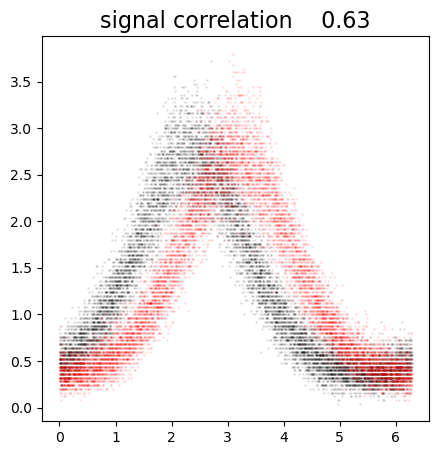

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(s, r1, alpha=0.08, color='black', s=1)
ax.scatter(s, r2, alpha=0.08, color='red', s=1)
correlation = np.corrcoef(r1, r2)
ax.set_title(f'signal correlation    {correlation[0, 1]:.2f}', fontsize=16)

### d)

 Confirm the law of total covariance by computing all of its components (2x2 matrices). (1 point)



covariance between two responses

E[r|s] naturally is a function of s

cov(E[r|s]) is covariance between two functions

The law of total covariance states:

$
\mathrm{Cov}(r_1, r_2) = \mathrm{Cov}_s(\mathbb{E}[r_1 \mid s], \mathbb{E}[r_2 \mid s]) + \mathbb{E}_s[\mathrm{Cov}(r_1, r_2 \mid s)]
$

covariance of r

In [69]:
cov_r = np.cov(r1, r2)

vectorize f(s)

In [50]:
f = np.array([f1, f2])
f.shape

(2, 20)

calculate E[f(s)]

In [57]:
Ef = f.mean(axis=1, keepdims=True)

signal covariance

In [62]:
cov_signal = (f @ f.T) / 20 - Ef @ Ef.T

noise covariance

In [ ]:
# covariance matrices of all bins separately
cov_bins = np.zeros((20, 2, 2))
for i in range(20):
    r1_i = r1[bin_indices == i]
    r2_i = r2[bin_indices == i]
    cov_bins[i] = np.cov(r1_i, r2_i)

cov_noise = cov_bins.mean(axis=0)

result

In [65]:
cov_signal, cov_noise

(array([[0.67221664, 0.4507896 ],
        [0.4507896 , 0.67255633]]),
 array([[0.05837532, 0.0043651 ],
        [0.0043651 , 0.05764561]]))

In [71]:
cov_r.round(2), cov_signal.round(2) + cov_noise.round(2)

(array([[0.73, 0.46],
        [0.46, 0.74]]),
 array([[0.73, 0.45],
        [0.45, 0.73]]))

### e)

 Now, we conduct a different experiment with only 2 stimuli: $s_1 = \frac\pi4$ and $s_2=\frac{\pi}{2}$. Draw 1000 stimuli each and create a scatter plot of the firing rate responses. In the same plot, for each neuron illustrate the covariance (with an ellipse) and the decision boundary (as a line). (2 points)



Text(0, 0.5, 'Neuron 2 Spikes')

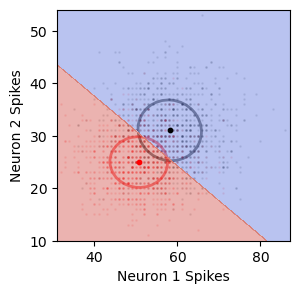

In [12]:
# again for 25 seconds of recording
s1, s2 = np.pi / 4 + np.ones(1000), np.pi / 2 * np.ones(1000)

r1s1, r1s2 = np.random.poisson(np.exp(np.sin(s1 - np.pi / 4)) * 25), np.random.poisson(
    np.exp(np.sin(s2 - np.pi / 4)) * 25
)
r2s1, r2s2 = np.random.poisson(np.exp(np.sin(s1 - np.pi / 2)) * 25), np.random.poisson(
    np.exp(np.sin(s2 - np.pi / 2)) * 25
)

fig, ax = plt.subplots(figsize=(3, 3))
ax.scatter(r1s1, r2s1, alpha=0.08, color="black", s=1)
ax.scatter(r1s2, r2s2, alpha=0.08, color="red", s=1)

# draw in ellipsis of covariance for stimulus 1 and stimulus 2


def draw_covariance_ellipse(ax, mean, cov, color="black", alpha=0.5):
    """Draw an ellipse representing the covariance."""
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(eigenvalues)  # scale by 2 for visibility
    ellipse = Ellipse(
        mean, width, height, angle=np.degrees(angle), color=color, alpha=alpha
    )
    ellipse.set_facecolor("none")
    ellipse.set_edgecolor(color)
    ellipse.set_linewidth(2)
    ax.scatter(*mean, color=color, s=10, zorder=3)

    ax.add_patch(ellipse)


draw_covariance_ellipse(
    ax, [r1s1.mean(), r2s1.mean()], np.cov(r1s1, r2s1), color="black", alpha=0.5
)
draw_covariance_ellipse(
    ax, [r1s2.mean(), r2s2.mean()], np.cov(r1s2, r2s2), color="red", alpha=0.5
)

# get optimal decision boundary


lda = LinearDiscriminantAnalysis()
X = np.concatenate([np.column_stack((r1s1, r2s1)), np.column_stack((r1s2, r2s2))])
lda.fit(X, np.concatenate([np.zeros(len(r1s1)), np.ones(len(r1s2))]))

DecisionBoundaryDisplay.from_estimator(
    lda,
    X,
    response_method="predict",
    ax=ax,
    cmap="coolwarm",
    alpha=0.4,
    grid_resolution=1000,
)

ax.set_xlabel("Neuron 1 Spikes")
ax.set_ylabel("Neuron 2 Spikes")

### f)

 Brainstorm at least three biologically plausible ways how noise covariances could appear in our measurements. Discuss whether they can be positive or negative. (1,5 points)

*Hint: You are allowed and encouraged to use the forum for an open exchange among students for this.*



1. common source:  spontaneous activation from a source that inputs to both our neurons
2. immidiate causal relation between neuron potentials: both neurons connected by many electric synapses
3. A inhibits B, if there are more spikes in A, B gets inhibited more strongly, supressing more noise in B

### g)

 Choose one model that allows for positive and (!) negative noise correlations and implement it. Repeat the plot from e) with positive and negative noise correlations (two subplots). Discuss and compute (with MDE) whether the noise correlations support or obstruct decoding. (4 points)

choose multiplicative noise

In [13]:
# use overlapping tuning curves from above
def f1(s):
    return np.exp(np.sin(s - np.pi / 4))


def f2(s):
    return np.exp(np.sin(s - np.pi / 2))


def f(s):
    return np.array(
        [
            [f1(s), f2(s)],
        ]
    ).T


def draw_covariance_ellipse(ax, mean, cov, color="black", alpha=0.5):
    """Draw an ellipse representing the covariance."""
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0])
    width, height = 2 * np.sqrt(eigenvalues)  # scale by 2 for visibility
    ellipse = Ellipse(
        mean, width, height, angle=np.degrees(angle), color=color, alpha=alpha
    )
    ellipse.set_facecolor("none")
    ellipse.set_edgecolor(color)
    ellipse.set_linewidth(2)
    ax.scatter(mean[0], mean[1], color=color, s=10, zorder=3)
    ax.add_patch(ellipse)


def plot_distribution(f, var, c, s1, s2, ax):
    """
    Sample from the model ri = fi(x) + ηi.
    Where
        ηi ~ N(0, Qij(x))
    is the noise with covariance matrix
        Qij (x) = σ**2 [δij + c(1 − δij )] * fi(x) * fj(x) .
    """

    Q1 = var * (np.eye(2) + c * (1 - np.eye(2))) * f(s1) * f(s1).T
    Q2 = var * (np.eye(2) + c * (1 - np.eye(2))) * f(s2) * f(s2).T

    r1 = f(s1).T + np.random.multivariate_normal(np.zeros(2), Q1, size=1000)
    r2 = f(s2).T + np.random.multivariate_normal(np.zeros(2), Q2, size=1000)

    ax.scatter(r2[:, 0], r2[:, 1], alpha=0.3, s=1, c="red")
    ax.scatter(r1[:, 0], r1[:, 1], alpha=0.3, s=1, c="black")

    draw_covariance_ellipse(ax, r1.mean(axis=0), np.cov(r1.T), color="black", alpha=0.5)
    draw_covariance_ellipse(ax, r2.mean(axis=0), np.cov(r2.T), color="red", alpha=0.5)

    lda = LinearDiscriminantAnalysis()
    X = np.concatenate([r1, r2])
    lda.fit(X, np.concatenate([np.zeros(len(r1)), np.ones(len(r2))]))

    DecisionBoundaryDisplay.from_estimator(
        lda,
        X,
        response_method="predict",
        ax=ax,
        cmap="coolwarm",
        alpha=0.4,
        grid_resolution=1000,
    )
    return r1, r2
    #

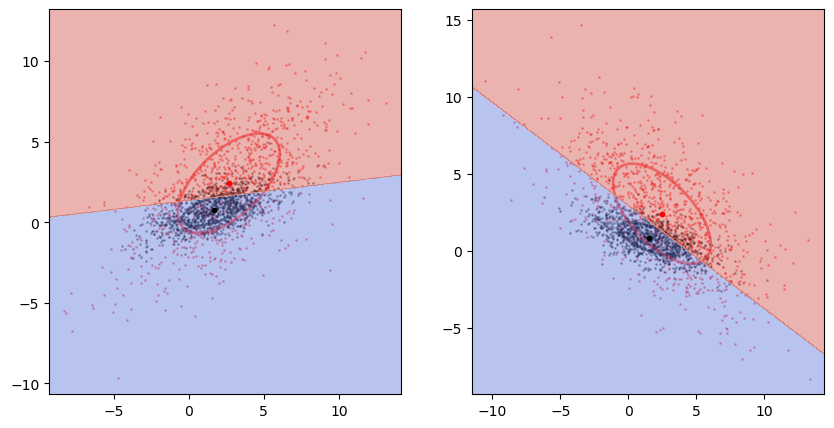

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

r_pos = plot_distribution(f, var=1.8, c=0.6, s1=1.3, s2=2.6, ax=ax[0])
r_neg = plot_distribution(f, var=1.8, c=-0.6, s1=1.3, s2=2.6, ax=ax[1]);

Compute MDE
- tuning curves (without noise)

Vary strength of correlation, compute MDE dependent on correltation strength and plot for
- positive noise correlation
- negative noise correlation 

In [15]:
x = np.linspace(0, 2 * np.pi, 1000)

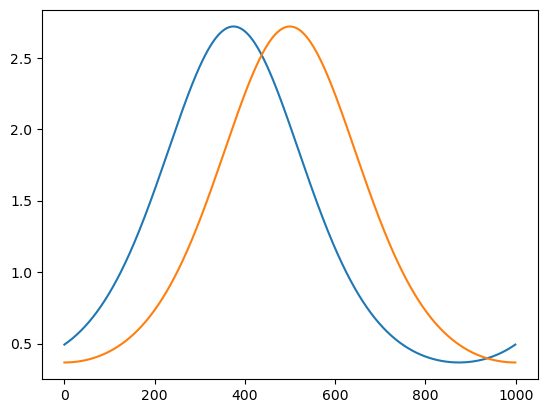

In [16]:
plt.plot(f1(x))
plt.plot(f2(x))

### h)

 Repeat g) for a different set of stimuli that have the opposite (inversed sign) signal correlation. (1 point)